# 05. Funnel Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from platform import python_version
print(python_version())

3.6.10


In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px solid lightgray;
}

## Load Dataset

In [8]:
user = pd.read_csv('E:/Collection_DS_takehome_challenges/Data/Funnel_Analysis/user_table.csv')
user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [11]:
homepage = pd.read_csv('E:/Collection_DS_takehome_challenges/Data/Funnel_Analysis/home_page_table.csv')
homepage.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [12]:
searchpage = pd.read_csv('E:/Collection_DS_takehome_challenges/Data/Funnel_Analysis/search_page_table.csv')
searchpage.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [14]:
paypage = pd.read_csv('E:/Collection_DS_takehome_challenges/Data/Funnel_Analysis/payment_page_table.csv')
paypage.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [15]:
paymentpage = pd.read_csv('E:/Collection_DS_takehome_challenges/Data/Funnel_Analysis/payment_confirmation_table.csv')
paymentpage.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


## Data Processing

In [19]:
data=pd.merge(left=user,right=homepage,how='left',on='user_id')
data=pd.merge(left=data,right=searchpage,how='left',on='user_id', suffixes=('_home', '_search'))
data=pd.merge(left=data,right=paypage,how='left',on='user_id')
data=pd.merge(left=data,right=paymentpage,how='left',on='user_id', suffixes=('_payment', '_confirmation'))

data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            90400 non-null  int64 
 1   date               90400 non-null  object
 2   device             90400 non-null  object
 3   sex                90400 non-null  object
 4   page_home          90400 non-null  object
 5   page_search        45200 non-null  object
 6   page_payment       6030 non-null   object
 7   page_confirmation  452 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.2+ MB


## Analysis

In [39]:
# Visit Probability for Each Page
ratio=1-pd.DataFrame(data.isnull().sum())/len(data)
ratio=ratio.rename(columns={0 :"conversion"})[4:].reset_index()
print(ratio)

               index  conversion
0          page_home    1.000000
1        page_search    0.500000
2       page_payment    0.066704
3  page_confirmation    0.005000


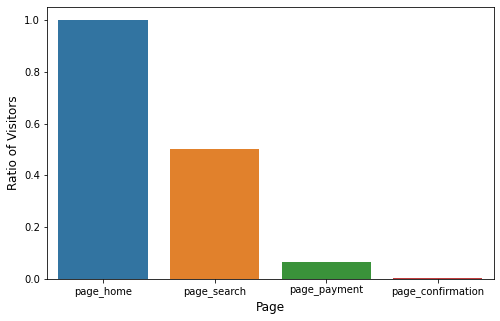

In [40]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='index', y='conversion', data=ratio, ax=ax)
ax.set_xlabel('Page', fontsize=12)
ax.set_ylabel('Ratio of Visitors', fontsize=12)
plt.show()

## Conversion Rate for Each Page

In [93]:
def conversion_rate(df):
    """ function to calculate conversion rates for home, search and payment page"""
    rates = []
    tmp = df[~df['page_home'].isnull()]
    rates.append(1 - tmp['page_search'].isnull().sum() / len(tmp))
    
    tmp = df[~df['page_search'].isnull()]
    rates.append(1 - tmp['page_payment'].isnull().sum() / len(tmp))
    
    tmp = df[~df['page_payment'].isnull()]
    rates.append(1 - tmp['page_confirmation'].isnull().sum() / len(tmp))
    
    return rates

In [142]:
#unique_page=list(data.columns[4:])
#print(unique_page)
page = []
count = []
unique_page=list(data.columns[4:])
print(unique_page)
for page in unique_page:
    tmp=data[['user_id',page]].groupby(page).count().values
    count=np.append(count,tmp)
    print(count)
        
table=pd.DataFrame({'page':unique_page ,'count':count}, columns=['page','count'])  
print(table)

table['count2']=table["count"].shift(1) 
table['conversion']=table["count"]/table["count2"]
print(table)


['page_home', 'page_search', 'page_payment', 'page_confirmation']
[90400.]
[90400. 45200.]
[90400. 45200.  6030.]
[90400. 45200.  6030.   452.]
                page    count
0          page_home  90400.0
1        page_search  45200.0
2       page_payment   6030.0
3  page_confirmation    452.0
                page    count   count2  conversion
0          page_home  90400.0      NaN         NaN
1        page_search  45200.0  90400.0    0.500000
2       page_payment   6030.0  45200.0    0.133407
3  page_confirmation    452.0   6030.0    0.074959


In [131]:
rates = conversion_rate(data)
print(rates)
names = ['home', 'search', 'payment']
maps = {'Page': ['home', 'search', 'payment'], 'Conversion Rate': rates}
overall_conv = pd.DataFrame(maps, columns=['Page', 'Conversion Rate'])

overall_conv

[0.5, 0.13340707964601772, 0.07495854063018237]


,Page,Conversion Rate
0,home,0.500000
1,search,0.133407
2,payment,0.074959


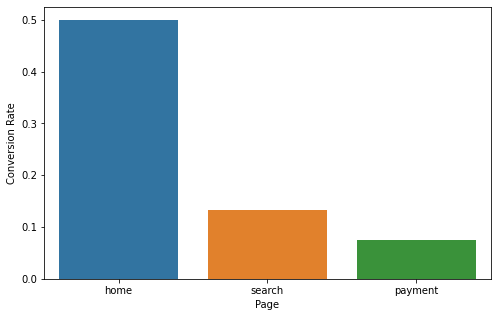

In [165]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=overall_conv, ax=ax)
plt.show()

## Page

In [144]:
print(data['device'].unique())

['Desktop' 'Mobile']


In [146]:
# Method1
desk_rates=conversion_rate(data[data['device']=='Desktop'])
mobile_rates=conversion_rate(data[data['device']=='Mobile'])
names = ['home', 'search', 'payment']
print('{0:^15s}|{1:10s}|{2:10s}'.format('Page', 'Desktop', 'Mobile'))
print('-'*40)

for names ,desk_rates, mobile_rates in zip(names,desk_rates,mobile_rates):
    print('{0:15s}|{1:10.6f}|{2:10.6f}'.format(names,desk_rates,mobile_rates))


     Page      |Desktop   |Mobile    
----------------------------------------
home           |  0.500000|  0.500000
search         |  0.100000|  0.200000
payment        |  0.049834|  0.100000


      Page   Device  Conversion Rate
0     home  Desktop         0.500000
1   search  Desktop         0.100000
2  payment  Desktop         0.049834
3     home   Mobile         0.500000
4   search   Mobile         0.200000
5  payment   Mobile         0.100000


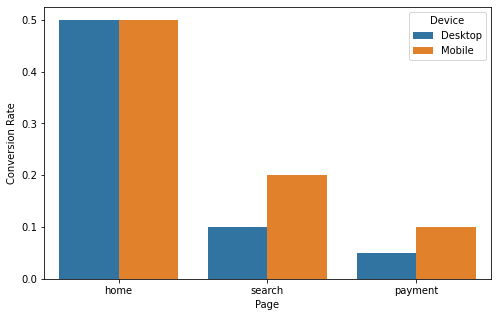

In [167]:
maps = {'Page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 
        'Device': ['Desktop', 'Desktop', 'Desktop', 'Mobile', 'Mobile', 'Mobile'], 
        'Conversion Rate': desk_rates + mobile_rates}
device_conv = pd.DataFrame(maps, columns=['Page', 'Device', 'Conversion Rate'])
print(device_conv)
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate',hue='Device', data=device_conv, ax=ax)
plt.show()

In [147]:
# Method2
desk_rates=conversion_rate(data[data['device']=='Desktop'])
mobile_rates=conversion_rate(data[data['device']=='Mobile'])
names = ['home', 'search', 'payment']
maps = {'Page': ['home', 'search', 'payment'], 'Desktop': desk_rates,'Mobile':mobile_rates}
overall_conv2 = pd.DataFrame(maps, columns=['Page', 'Desktop','Mobile'])

overall_conv2


,Page,Desktop,Mobile
0,home,0.500000,0.5
1,search,0.100000,0.2
2,payment,0.049834,0.1


In [164]:
#unique_page=list(data.columns[4:])
#print(unique_page)
page = []
count1 = []
count2 = []
unique_page=list(data.columns[4:])
print(unique_page)
for page in unique_page:
    tmp1=data[data['device']=='Desktop'][['user_id',page]].groupby(page).count().values
    tmp2=data[data['device']=='Mobile'][['user_id',page]].groupby(page).count().values
    count1=np.append(count1,tmp1)
    count2=np.append(count2,tmp2)
    print(count1,count2)
        
table=pd.DataFrame({'page':unique_page ,'Desktop':count1 ,'Mobile':count2}, columns=['page','Desktop','Mobile'])  
print(table)

table['count1_lag']=table["Desktop"].shift(1) 
table['conversion_desktop']=table["Desktop"]/table["count1_lag"]
table['count2_lag']=table["Mobile"].shift(1) 
table['conversion_mobile']=table["Mobile"]/table["count2_lag"]
table.drop(['count1_lag','count2_lag'],1,inplace=True)
print(table)


['page_home', 'page_search', 'page_payment', 'page_confirmation']
[60200.] [30200.]
[60200. 30100.] [30200. 15100.]
[60200. 30100.  3010.] [30200. 15100.  3020.]
[60200. 30100.  3010.   150.] [30200. 15100.  3020.   302.]
                page  Desktop   Mobile
0          page_home  60200.0  30200.0
1        page_search  30100.0  15100.0
2       page_payment   3010.0   3020.0
3  page_confirmation    150.0    302.0
                page  Desktop   Mobile  conversion_desktop  conversion_mobile
0          page_home  60200.0  30200.0                 NaN                NaN
1        page_search  30100.0  15100.0            0.500000                0.5
2       page_payment   3010.0   3020.0            0.100000                0.2
3  page_confirmation    150.0    302.0            0.049834                0.1


## Sex

In [168]:
print(data['sex'].unique())

['Female' 'Male']


In [175]:
#unique_page=list(data.columns[4:])
#print(unique_page)
page = []
count1 = []
count2 = []
unique_page=list(data.columns[4:])
print(unique_page)
for page in unique_page:
    tmp1=data[data['sex']=='Male'][['user_id',page]].groupby(page).count().values
    tmp2=data[data['sex']=='Female'][['user_id',page]].groupby(page).count().values
    count1=np.append(count1,tmp1)
    count2=np.append(count2,tmp2)
    print(count1,count2)
        
table=pd.DataFrame({'page':unique_page ,'Male':count1 ,'Female':count2}, columns=['page','Male','Female'])  
print(table)

table['count1_lag']=table["Male"].shift(1) 
table['conversion_male']=table["Male"]/table["count1_lag"]
table['count2_lag']=table["Female"].shift(1) 
table['conversion_female']=table["Female"]/table["count2_lag"]
table.drop(['count1_lag','count2_lag'],1,inplace=True)
print(table)


['page_home', 'page_search', 'page_payment', 'page_confirmation']
[45325.] [45075.]
[45325. 22524.] [45075. 22676.]
[45325. 22524.  2930.] [45075. 22676.  3100.]
[45325. 22524.  2930.   211.] [45075. 22676.  3100.   241.]
                page     Male   Female
0          page_home  45325.0  45075.0
1        page_search  22524.0  22676.0
2       page_payment   2930.0   3100.0
3  page_confirmation    211.0    241.0
                page     Male   Female  conversion_male  conversion_female
0          page_home  45325.0  45075.0              NaN                NaN
1        page_search  22524.0  22676.0         0.496944           0.503073
2       page_payment   2930.0   3100.0         0.130083           0.136708
3  page_confirmation    211.0    241.0         0.072014           0.077742


In [179]:
print(type(table))
table.iloc[1:,[0,-2,-1]]

<class 'pandas.core.frame.DataFrame'>


,page,conversion_male,conversion_female
1,page_search,0.496944,0.503073
2,page_payment,0.130083,0.136708
3,page_confirmation,0.072014,0.077742


      Page     Sex  Conversion Rate
0     home    Male         0.496944
1   search    Male         0.130083
2  payment    Male         0.072014
3     home  Female         0.503073
4   search  Female         0.136708
5  payment  Female         0.077742


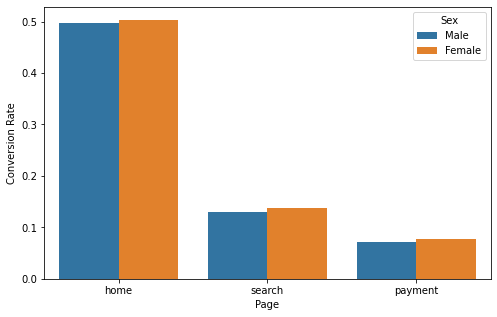

In [184]:

maps = {'Page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 
        'Sex': ['Male', 'Male', 'Male', 'Female', 'Female', 'Female'], 
        'Conversion Rate': np.append(table.iloc[1:,-2] , table.iloc[1:,-1])}
sex_conv = pd.DataFrame(maps, columns=['Page', 'Sex', 'Conversion Rate'])
print(sex_conv)
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate',hue='Sex', data=sex_conv, ax=ax)
plt.show()